# Web Scraping and Data Analysis (British Airways Reviews) 

In order to do web scraping data from Skytrax, we have used **Python** and **BeautifulSoup** to collect all the links of the reviews and collected the text data of each of the individual review links for our project.

For **British Airways Reviews Dataset**, please refer to the link below:\
`https://www.airlinequality.com/airline-reviews/british-airways`

## (A). Importing important packages and libraries:

In [1]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## (B). Web-scraping using Beautiful Soup:

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

# list to store the reviews
reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Creating URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collecting HTML data from this page
    response = requests.get(url)

    # Parsing the website with html parser for scraping convinently
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


**Saving the reviews in a data frame:**

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I will never travel with Br...
1,✅ Trip Verified | I am already in Portugal so...
2,✅ Trip Verified | Terrible. Avoid this airlin...
3,✅ Trip Verified | Despite being a gold member...
4,Not Verified | Regarding the aircraft and seat...


In [4]:
df.to_csv("D:\AI & Data Science Certifications\British Airways\BA_reviews.csv")

## (C). Exploratory Data Analysis (EDA):


In [5]:
csv_path = "D:\AI & Data Science Certifications\British Airways\BA_reviews.csv"
dfba = pd.read_csv(csv_path)
dfba.reset_index(drop=True, inplace=True)
dfba = dfba.drop('Unnamed: 0', axis=1)

print(dfba.head)

<bound method NDFrame.head of                                                 reviews
0     ✅ Trip Verified |  I will never travel with Br...
1     ✅ Trip Verified |  I am already in Portugal so...
2     ✅ Trip Verified |  Terrible. Avoid this airlin...
3     ✅ Trip Verified |  Despite being a gold member...
4     Not Verified | Regarding the aircraft and seat...
...                                                 ...
1995  ✅ Verified Review |  Flew London Heathrow to W...
1996  ✅ Verified Review |  I fly this route 3-4 time...
1997  Flew Zurich to London Heathrow. Very friendly ...
1998  ✅ Verified Review |  Flew British Airways from...
1999  ✅ Verified Review | Flew London Gatwick to Tam...

[2000 rows x 1 columns]>


In [6]:
print(dfba['reviews'])

0       ✅ Trip Verified |  I will never travel with Br...
1       ✅ Trip Verified |  I am already in Portugal so...
2       ✅ Trip Verified |  Terrible. Avoid this airlin...
3       ✅ Trip Verified |  Despite being a gold member...
4       Not Verified | Regarding the aircraft and seat...
                              ...                        
1995    ✅ Verified Review |  Flew London Heathrow to W...
1996    ✅ Verified Review |  I fly this route 3-4 time...
1997    Flew Zurich to London Heathrow. Very friendly ...
1998    ✅ Verified Review |  Flew British Airways from...
1999    ✅ Verified Review | Flew London Gatwick to Tam...
Name: reviews, Length: 2000, dtype: object


In [7]:
# Dataset Rows & Columns count
print("Total Rows: ", dfba.shape[0])
print("Total Columns: ", dfba.shape[1])

Total Rows:  2000
Total Columns:  1


In [8]:
# Dataset Columns
dfba.columns

Index(['reviews'], dtype='object')

In [9]:
dfba.info()
dfba.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


,reviews
count,2000
unique,2000
top,✅ Verified Review | I had a perfectly satisfa...
freq,1


In [10]:
# Missing Values/Null Values Count
dfba.isna().sum()

reviews    0
dtype: int64

There are no null/ missing values in our dataset. \
The customized dataset contains 2000 unique entries. 

**For Data cleaning:**
1. We'll remove `✅ Trip Verified |` and `Not Verified |` to clean the data.
2. Remove any leading or trailing spaces. 
3. Transforming the all the review text string to `lower case`.

In [11]:
dfba['reviews'] = dfba['reviews'].str.strip()
dfba['reviews']=dfba['reviews'].str.lstrip('✅ Trip Verified |')
dfba['reviews']=dfba['reviews'].str.lstrip('Not Verified |')
dfba['reviews']= dfba['reviews'].str.lower()
print(dfba)

                                                reviews
0     i will never travel with british airways again...
1     i am already in portugal so contacted them tod...
2     ble. avoid this airline. it’s now becoming reg...
3     despite being a gold member, the british airwa...
4     regarding the aircraft and seat: the business ...
...                                                 ...
1995  review |  flew london heathrow to washington d...
1996  review |  i fly this route 3-4 times a year, u...
1997  flew zurich to london heathrow. very friendly ...
1998  review |  flew british airways from boston to ...
1999  review | flew london gatwick to tampa. ba club...

[2000 rows x 1 columns]


## (D). Sentiment analysis of reviews using NLTK:


We use **NLTK** aka `Natural Language Processing Toolkit`, a package in python made especially for text-based analysis.

First, we remove the **punctuation marks** and then the words which don’t add sentiment to the sentence, also called as `stopwords`. Afterwards, we'll tokenize the `review` column using the method *word_tokenize()* to split a sentence into words.

**Tokenization** in NLP is the process by which a large quantity of text is divided into smaller parts called `tokens`.  The output can be converted to a Data Frame for better text understanding in machine learning applications or can be provided as input for further text cleaning steps such as punctuation removal, numeric character removal or stemming. Machine learning models need numeric data to be trained and make a prediction. Word tokenization becomes a crucial part of the text (string) to numeric data conversion.

### Removing punctuation


In [12]:
# Removing punctuation
dfba['reviews'] = dfba['reviews'].str.replace('[^\w\s]','')
print(dfba['reviews'])
dfreviews = dfba['reviews']

0       i will never travel with british airways again...
1       i am already in portugal so contacted them tod...
2       ble avoid this airline its now becoming regula...
3       despite being a gold member the british airway...
4       regarding the aircraft and seat the business c...
                              ...                        
1995    review   flew london heathrow to washington dc...
1996    review   i fly this route 34 times a year unfo...
1997    flew zurich to london heathrow very friendly s...
1998    review   flew british airways from boston to b...
1999    review  flew london gatwick to tampa ba club w...
Name: reviews, Length: 2000, dtype: object


In [13]:
# Tokenization of words
import nltk

print(dfba.iloc[0,0])
dfba['reviews'] = dfba.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)


i will never travel with british airways again i spent over 10000 on a business class seat to attend a funeral in the uk first the boeing 7879 cabin has 7 seats across the aisle so what you are getting in reality is premium economy the seats are narrow and effectively are a business class seat cut in half they have squeezed these seats in which means that some passengers bump their heads into the bulkhead when they stand up and many have to clamber over others to go to the toilet which wakes up that passenger the whole point about business class is that you pay to rest and have privacy and not have someone push over the top of you second the food was disgusting third the service terrible fourth the toilet was tiny fifth the inflight screen was fixed and too high so i could not see anything sixth their baggage handling is also appalling meaning that my taxi was waiting for 2 hours and i had to pay more no free airport transfers with british airways seventh the charging points did not wo

In [14]:
print(dfba.iloc[1,0])

['i', 'am', 'already', 'in', 'portugal', 'so', 'contacted', 'them', 'today', 'and', 'they', 'cancelled', 'my', 'return', 'flight', 'because', 'i', 'was', '10', 'minutes', 'late', 'calling', 'them', 'even', 'though', 'i', 'tried', 'for', '2', 'hours', 'to', 'get', 'through', 'the', 'day', 'before', 'now', 'i', 'am', 'unable', 'to', 'get', 'back', 'and', 'they', 'have', 'kept', 'the', '500', 'pounds', 'customer', 'service', 'is', 'shocking', 'they', 'have', 'no', 'intention', 'of', 'helping', 'you']


### Removing stopwords


In [15]:
# Removing stopwords
dfba['reviews'] = dfba['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(dfba.head(20))

                                              reviews
0   never travel british airways spent 10000 busin...
1   already portugal contacted today cancelled ret...
2   ble avoid airline becoming regular practice ca...
3   despite gold member british airways staff heat...
4   regarding aircraft seat business class seats f...
5   travelled british airways sweden los angeles v...
6   food lousy ever planning asian hindu vegetaria...
7   worst experience flight london toronto got del...
8   ground staff helpful felt like wanted rush us ...
9   second time ba premium economy newer aircraft ...
10  changed flights brussels london heathrow lax 4...
11  copenhagen chaotic ticket counter assignment h...
12  worst experience life trying deal customer ser...
13  due code sharing cathay pacific downgraded ba ...
14  lhr check quick first wing quickly security fi...
15  wouldnt recommend british airways tried call c...
16  absolutely horrible experience booked ticket e...
17  worst airline one thing 

### Calculating polarity to gather sentiment tags



In [16]:
def polarity_cal(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
        
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
dfba['polarity'] = dfba['reviews'].apply(polarity_cal)


dfba['tag'] = dfba['polarity'].apply(tag_cal)

print(dfba)

                                                reviews  polarity       tag
0     never travel british airways spent 10000 busin... -0.073333  Negative
1     already portugal contacted today cancelled ret... -0.450000  Negative
2     ble avoid airline becoming regular practice ca...  0.131250  Positive
3     despite gold member british airways staff heat...  0.061111  Positive
4     regarding aircraft seat business class seats f... -0.016892  Negative
...                                                 ...       ...       ...
1995  review flew london heathrow washington dc busi... -0.083333  Negative
1996  review fly route 34 times year unfortunately c...  0.014678  Positive
1997  flew zurich london heathrow friendly staff gre...  0.395833  Positive
1998  review flew british airways boston berlin via ...  0.202381  Positive
1999  review flew london gatwick tampa ba club world...  0.286640  Positive

[2000 rows x 3 columns]


## Analyzing the percentage of different tags:

In [17]:
(dfba.groupby('tag').size()/dfba['tag'].count())*100


tag
Negative    31.45
Neutral      0.80
Positive    67.75
dtype: float64

## (E). Visualizing the results


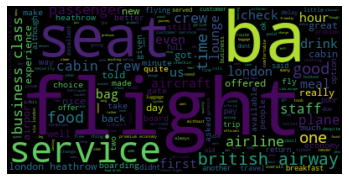

In [18]:
text1 = " "
for ind in dfba.index:
    if dfba['tag'][ind] == "Positive":
        text1 = text1 + dfba['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text1)

# Display the generated image
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

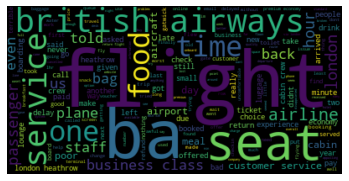

In [19]:
text2 = " "        
for ind in dfba.index:
    if dfba['tag'][ind] == "Negative":
        text2 = text2 + dfba['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)

# Display the generated image
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

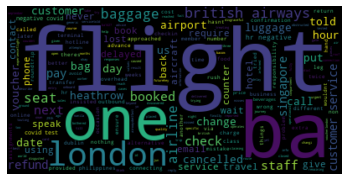

In [20]:
text3 = " "        
for ind in dfba.index:
    if dfba['tag'][ind] == "Neutral":
        text3 = text3 + dfba['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text3)

# Display the generated image
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

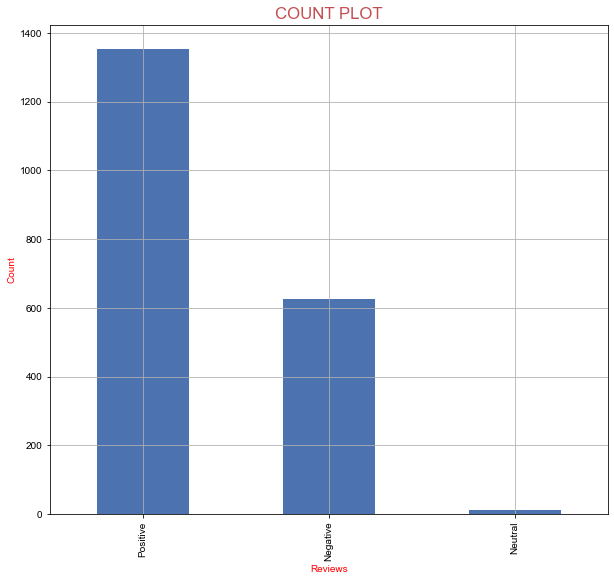

In [21]:
dfba['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
dfba['tag'].value_counts().plot(kind='bar', figsize=(10, 9))
plt.xlabel("Reviews", color = 'red')
plt.ylabel("Count", color = 'red')
plt.title("COUNT PLOT", color = 'r');